In [ ]:
pip install seaborn

In [104]:
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import time

In [6]:
def min_dist(x,y):
    dists = [abs(x), abs(y), abs(1-x), abs(1-y)]
    return np.min(dists)

In [7]:
def square(x, y, dist, p = 0.5):
    x_ub = x + dist*p/2
    x_lb = x - dist*p/2
    y_ub = y + dist*p/2
    y_lb = y - dist*p/2
    x_ = x_lb + (x_ub - x_lb)*np.random.rand();
    y_ = y_lb + (y_ub - y_lb)*np.random.rand();
    coords = [x_ub, x_lb, y_ub, y_lb]
    return coords, x_, y_

In [45]:
def counter(cnt_array, x, y, num_bins = 1000):
    x_ = x*num_bins
    y_ = y*num_bins
    cnt_array[int(x_), int(y_)]+= 1

# Part A

In [163]:
p = 1/2;
x = np.random.rand()
y = np.random.rand()
num_bins = 10
max_iters = 200
probs = np.zeros((num_bins, num_bins))

coords_x = []
coords_y = []
dists = []
for i in range(max_iters):
    counter(probs, x, y, num_bins = num_bins)
    coords_x.append(x)
    coords_y.append(y)
    dist = min_dist(x,y)
    dists.append(dist)
    coord, x, y = square(x, y, dist, p = p)
    

**Heatmap**

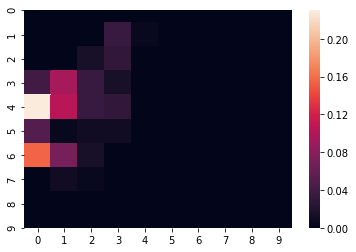

In [164]:
ax = sns.heatmap(probs/max_iters)

**More Coloser plot**

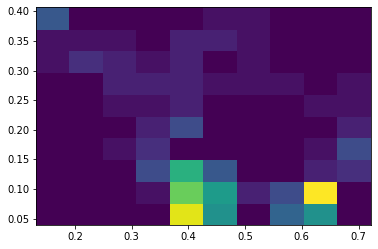

In [165]:
xs = np.array(coords_x)
ys = np.array(coords_y)
plt.hist2d(xs, ys)
plt.show()

# Part B

In [166]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

def add_arrow_to_line2D(
    axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8],
    arrowstyle='-|>', arrowsize=1, transform=None, color = 'red'):
    """
    Add arrows to a matplotlib.lines.Line2D at selected locations.

    Parameters:
    -----------
    axes: 
    line: Line2D object as returned by plot command
    arrow_locs: list of locations where to insert arrows, % of total length
    arrowstyle: style of the arrow
    arrowsize: size of the arrow
    transform: a matplotlib transform instance, default to data coordinates

    Returns:
    --------
    arrows: list of arrows
    """
    if not isinstance(line, mlines.Line2D):
        raise ValueError("expected a matplotlib.lines.Line2D object")
    x, y = line.get_xdata(), line.get_ydata()

    arrow_kw = {
        "arrowstyle": arrowstyle,
        "mutation_scale": 10 * arrowsize,
    }
    
    
    use_multicolor_lines = isinstance(color, np.ndarray)
    if use_multicolor_lines:
        raise NotImplementedError("multicolor lines not supported")
    else:
        arrow_kw['color'] = color

    linewidth = line.get_linewidth()
    if isinstance(linewidth, np.ndarray):
        raise NotImplementedError("multiwidth lines not supported")
    else:
        arrow_kw['linewidth'] = linewidth

    if transform is None:
        transform = axes.transData

    arrows = []
    for loc in arrow_locs:
        s = np.cumsum(np.sqrt(np.diff(x) ** 2 + np.diff(y) ** 2))
        n = np.searchsorted(s, s[-1] * loc)
        arrow_tail = (x[n], y[n])
        arrow_head = (np.mean(x[n:n + 2]), np.mean(y[n:n + 2]))
        p = mpatches.FancyArrowPatch(
            arrow_tail, arrow_head, transform=transform,
            **arrow_kw)
        axes.add_patch(p)
        arrows.append(p)
    return arrows

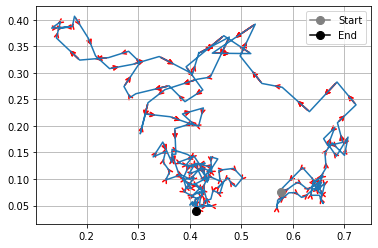

In [167]:
xs = np.array(coords_x)
ys = np.array(coords_y)


fig, ax = plt.subplots(1, 1)
# print the line and the markers in seperate steps
line, = ax.plot(xs, ys, '-')
add_arrow_to_line2D(ax, line, arrow_locs=np.linspace(0., 1., max_iters),
                    arrowstyle='->', color = 'red')

plt.plot([xs[0]], [ys[0]], marker='o', markersize=8, color="gray", label = 'Start')
plt.plot([xs[-1]], [ys[-1]], marker='o', markersize=8, color="k", label = 'End')
plt.grid()
plt.legend()
plt.show()

# Part C

In [161]:
times = []
iters = 100
num_bins = 10
max_iters = 200

for p in np.arange(0,1,.05):
    elapsed = 0
    for i in range(iters):
        start = time.time()
        x = np.random.rand()
        y = np.random.rand()
        probs = np.zeros((num_bins, num_bins))

        coords_x = []
        coords_y = []
        dists = []
        for i in range(max_iters):
            counter(probs, x, y, num_bins = num_bins)
            dist = min_dist(x,y)
            coord, x, y = square(x, y, dist, p = p) 
        elapsed = elapsed + time.time() - start
    times.append(elapsed/iters)

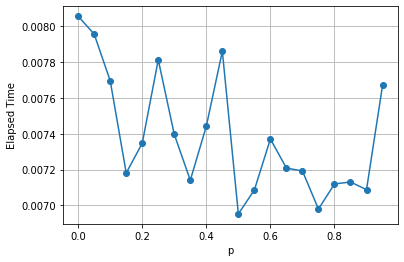

In [162]:
plt.plot(np.arange(0,1,.05), times, 'o-')
plt.xlabel('p')
plt.ylabel('Elapsed Time')
plt.grid()